In [8]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'mckayla-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

##Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
## Dropping NO
house_price = house_price.drop(columns = ['No','transaction_date'],axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
from sklearn.model_selection import train_test_split

##Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

##Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
from sklearn.linear_model import LinearRegression

## Building the linear model
lm_md = LinearRegression().fit(X_train,Y_train)

In [12]:
## Predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred

array([39.70545334, 46.71761262, 25.87205021, 44.97481527, 46.34777082,
       34.52563566, 48.71836279, 26.22097665, 45.94339808, 33.43440149,
       27.5763115 , 42.25015362, 47.52274414, 41.06096831, 48.05486076,
       23.00546627, 48.11839093,  7.73864129, 42.52024226, 39.28590367,
       31.30130611, 41.07119115, 40.74092869, 48.34720991, 26.06277799,
       41.17774116, 15.08866765, 44.49832777, 37.94108874, 42.25166157,
       38.00566106, 51.60988241, 46.21108578,  7.28209524, 39.08443774,
       43.83340365, 36.32882599, 41.1931065 , 42.29955024, 39.47794173,
       29.91906666, 32.16421923, 36.61972238, 33.22019873, 46.56942277,
       26.08117446, 43.06654449, 41.07272961, 33.46408305, 45.23195299,
       39.74391124, 49.74384891, 30.15833425, 33.148865  , 11.69709141,
       50.18547303, 44.13881865, 43.72393778, 41.39478481, 51.42956189,
       54.0709211 , 40.71623038, 15.11336596, 48.14824677, 41.56886621,
       46.39716744, 42.47381854, 47.45542606, 33.79514817, 43.27

<function matplotlib.pyplot.show(close=None, block=None)>

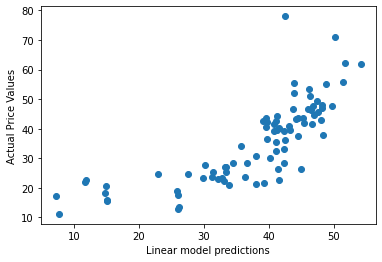

In [14]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred,Y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual Price Values')
plt.show